In [3]:
import pymc as pm
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import arviz as az

## Week 8 Homework

---

### Q1: derive the following

1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a $\mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$

2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).

#### [Optional] Q1 Extra: derive the following

Show that for $s_i=1$ and **hyperparameters** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either **normal** or **Laplace** prior distributions have analagous forms to the **ridge** and **lasso** loss functions.

*Note though that Bayesians do not optimize posterior distributions, they sample from them; but, nonetheless, the posterior distributions serve to provided 'regularizeations' of the likelihood through the prior.*


### Q2: perform Bayesian Linear Regression

- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma` 
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q2 Extra: perform generalized Bayesian Linear Regression

Replace the residual distribution and use an appropriate link function


### Q3: perform robust Bayesian Linear Regression

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\boldsymbol \beta, \tau,\tau_i)$ be $\mathcal{N}(y_i | \textbf{X} \boldsymbol \beta, \overset{\textrm{precision}}{\tau \times \tau_i})$. 

- Return to your dataset and maniputate it to have some various outliers or find another dataset with some outlier data
- Use an appropriate prior for inference on $v$ if you have enough data to do so
- Use the posterior distributions of the $\tau_i$'s to identify data point "outliers" 
- Use the posterior distributions of the $\sigma_i^{-2} = \tau \times \tau_i$ to create posterior distribuitions of the **influence** (the diagonals of the $H$ "hat" matrix $X^\top (X^\top D X)^{-1} X$ where $D_{ij}=0$ and $D_{ii} = \sigma^2_i$) and compare and contras some example "outlier" versus "non outlier" data points

- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q3 Extra: measurement error models?

What if $\textbf{x}_i = \textbf{x}_i^{true} + \eta_i, \eta_i \sim \mathcal{MVN}(\textbf{0}, \Sigma)$ for some kind of measurement error covariance structure $\Sigma$ and $\mathcal N (y_i| \textbf{X}^{true}\boldsymbol \beta, \sigma)$?





# Q1 (1)

### Derivation of $( p(\beta | y, \mathbf{X}, \Sigma = \sigma^2 I) $)

Given:
- The likelihood function is proportional to:
  $[
  \exp \left( -\frac{1}{2} (y - \mathbf{X} \beta)^T \Sigma^{-1} (y - \mathbf{X} \beta) \right)
  $]
  with $( \Sigma = \sigma^2 I $), so:
  $[
  p(y | \beta, \mathbf{X}) \propto \exp \left( -\frac{1}{2 \sigma^2} (y - \mathbf{X} \beta)^T (y - \mathbf{X} \beta) \right)
  $]

- Prior: 
  $[
  \beta \sim \mathcal{MVN}(\beta_0, \Sigma_{\beta})
  $]
  so:
  $[
  p(\beta) \propto \exp \left( -\frac{1}{2} (\beta - \beta_0)^T \Sigma_{\beta}^{-1} (\beta - \beta_0) \right)
  $]

Using Bayes' theorem:
$[
p(\beta | y, \mathbf{X}) \propto p(y | \beta, \mathbf{X}) p(\beta)
$]

Expanding both terms:
$[
\begin{aligned}
    p(\beta | y, \mathbf{X}) &\propto \exp \left( -\frac{1}{2 \sigma^2} (y - \mathbf{X} \beta)^T (y - \mathbf{X} \beta) \right) \\
    &\quad \times \exp \left( -\frac{1}{2} (\beta - \beta_0)^T \Sigma_{\beta}^{-1} (\beta - \beta_0) \right)
\end{aligned}
$]

Rearrange the exponent:
$[
\begin{aligned}
    & -\frac{1}{2 \sigma^2} (y^T y - 2 y^T \mathbf{X} \beta + \beta^T \mathbf{X}^T \mathbf{X} \beta) - \frac{1}{2} (\beta - \beta_0)^T \Sigma_{\beta}^{-1} (\beta - \beta_0)
\end{aligned}
$]

Rewriting the quadratic form in $(\beta$):
$[
\begin{aligned}
    & -\frac{1}{2} \left[ \beta^T \left( \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{X} + \Sigma_{\beta}^{-1} \right) \beta - 2 \beta^T \left( \frac{1}{\sigma^2} \mathbf{X}^T y + \Sigma_{\beta}^{-1} \beta_0 \right) \right]
\end{aligned}
$]

This is the quadratic form of a multivariate normal distribution:
$[
p(\beta | y, \mathbf{X}) = \mathcal{MVN}(\beta_n, \Sigma_n)
$]
where:
$[
\Sigma_n = \left( \mathbf{X}^T \mathbf{X} / \sigma^2 + \Sigma_{\beta}^{-1} \right)^{-1}
$]
$[
\beta_n = \Sigma_n \left( \mathbf{X}^T y / \sigma^2 + \Sigma_{\beta}^{-1} \beta_0 \right)
$]

# Q1 (2)

### Posterior Distribution of $( \sigma^2 $) in a Linear Regression Model

Given:
- The likelihood function for a linear regression model:
  $[
  y | \beta, \sigma^2 \sim \mathcal{N}(\mathbf{X} \beta, \sigma^2 I)
  $]
  which implies:
  $[
  p(y | \beta, \sigma^2) \propto (\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} (y - \mathbf{X} \beta)^T (y - \mathbf{X} \beta) \right)
  $]

- The prior for $( \sigma^2 $) follows an **inverse-gamma** distribution:
  $[
  \sigma^2 \sim \text{Inv-Gamma}(\alpha^*, \beta^*)
  $]
  meaning:
  $[
  p(\sigma^2) \propto (\sigma^2)^{-\alpha^* - 1} \exp \left( -\frac{\beta^*}{\sigma^2} \right)
  $]

Using Bayes' Theorem:
$[
p(\sigma^2 | y) \propto p(y | \beta, \sigma^2) p(\sigma^2)
$]

Since the likelihood is Gaussian, we integrate out $( \beta $) using the posterior $( \beta | y, \sigma^2 \sim \mathcal{N}(\beta_n, \Sigma_n) $), leading to the marginal likelihood:
$[
(y - \mathbf{X} \beta)^T (y - \mathbf{X} \beta) = y^T y - 2 y^T \mathbf{X} \beta + \beta^T \mathbf{X}^T \mathbf{X} \beta
$]
Integrating over $( \beta $), we obtain the sum of squared residuals:
$[
S = y^T y - \beta_n^T \mathbf{X}^T y
$]

Thus, the posterior distribution of $( \sigma^2 $) follows an **inverse-gamma**:
$[
\sigma^2 | y \sim \text{Inv-Gamma}(\alpha_n, \beta_n)
$]
where:
$[
\alpha_n = \alpha^* + \frac{n}{2}
$]
$[
\beta_n = \beta^* + \frac{1}{2} (y^T y - \beta_n^T \mathbf{X}^T y)
$]


X shape: (309, 3)
y shape: (309,)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [betas, alpha, sigma]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


            mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha     60.414  1.932    56.725     64.103      0.046    0.032    1798.0   
betas[0]   0.725  0.720    -0.688      2.126      0.015    0.011    2322.0   
betas[1]  -0.379  0.690    -1.749      0.928      0.013    0.010    2617.0   
betas[2]   1.003  0.672    -0.285      2.302      0.014    0.010    2403.0   
sigma      8.209  0.329     7.548      8.851      0.006    0.004    3235.0   

          ess_tail  r_hat  
alpha       2295.0    1.0  
betas[0]    2607.0    1.0  
betas[1]    2537.0    1.0  
betas[2]    2702.0    1.0  
sigma       2390.0    1.0  


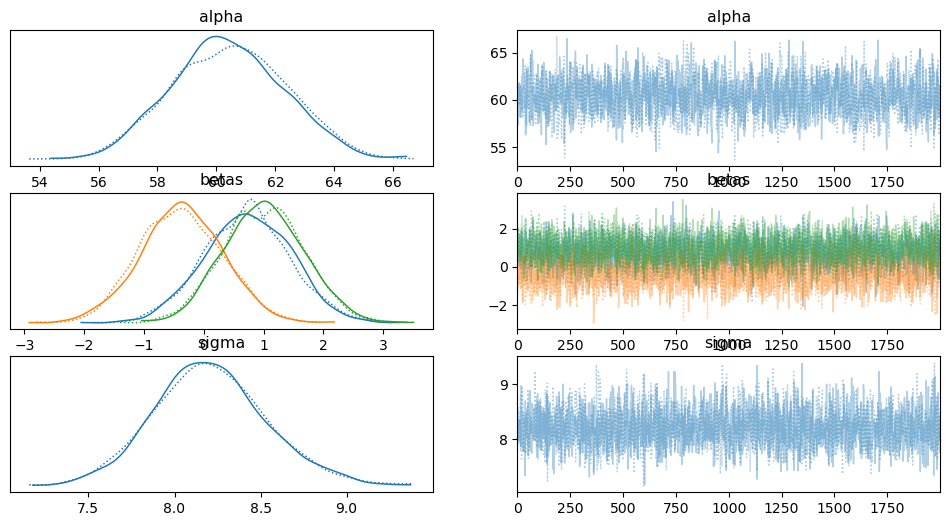

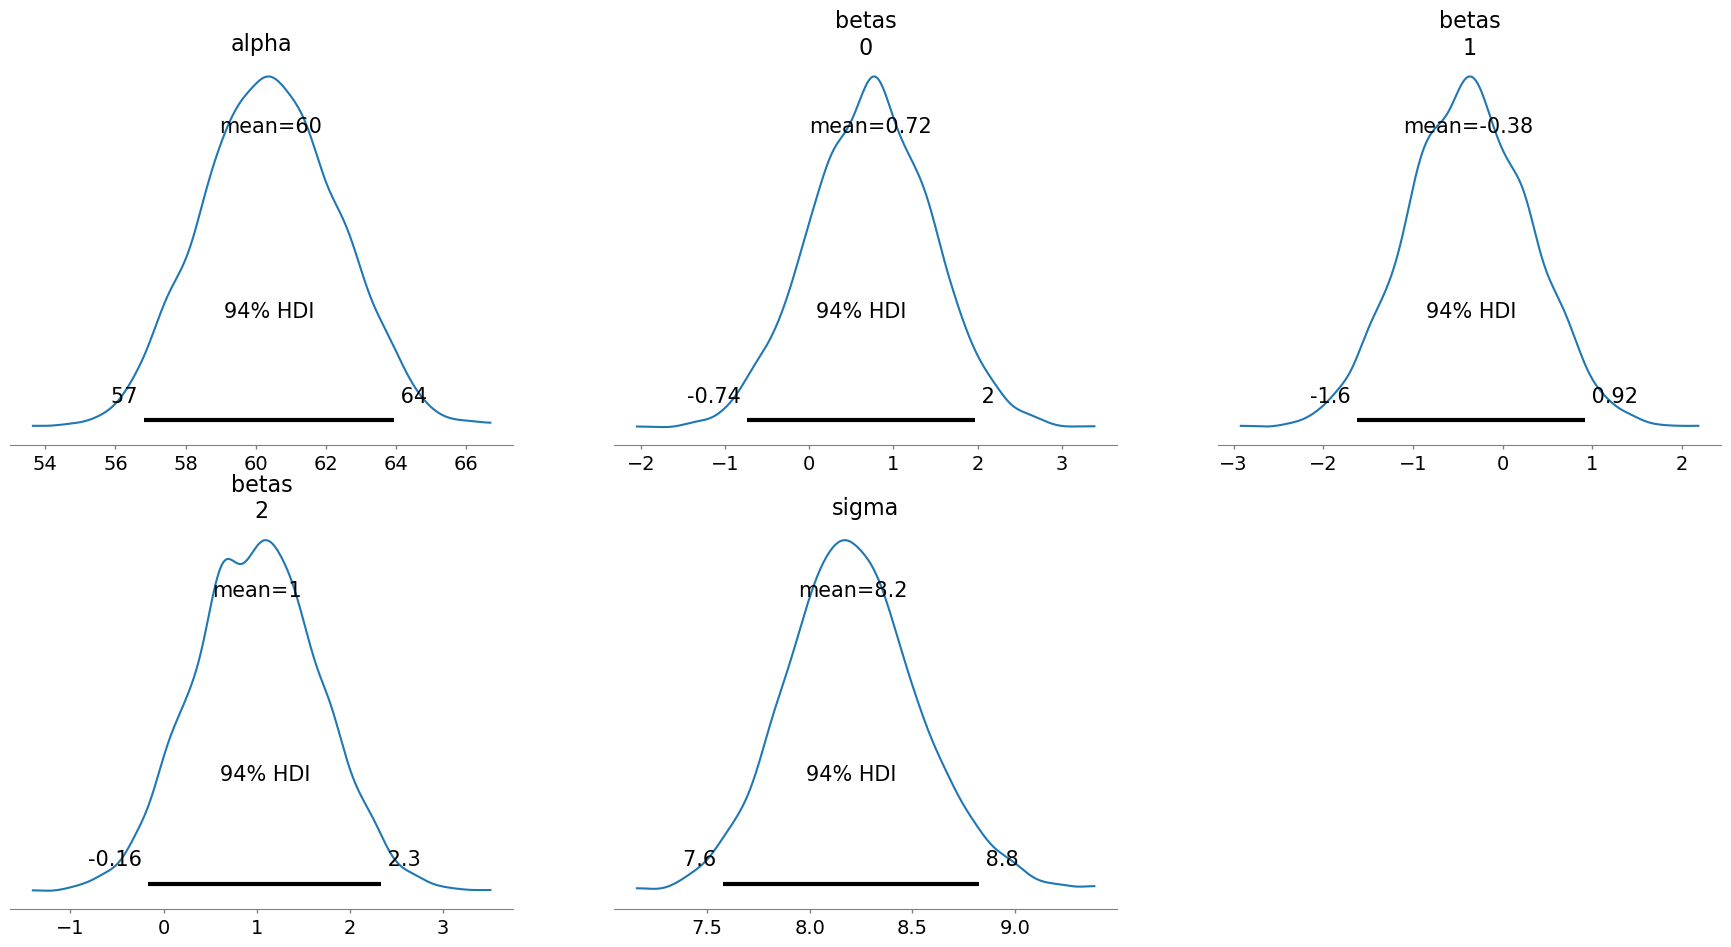

In [50]:
# Q2
import pandas as pd 
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

import pandas as pd

# 1. Load CSV
data = pd.read_csv("survey lung cancer.csv")

# 2. Ensure categorical variables are numeric
# Remove any accidental whitespace in column names
data.columns = data.columns.str.strip()

# 3. Specify predictors and outcome column names
predictor_cols = ['FATIGUE', 'SMOKING', 'ANXIETY']  # Numeric predictors
outcome_col = 'AGE'  # Target variable

# 4. Drop missing values
data = data.dropna(subset=predictor_cols + [outcome_col])

# 5. Prepare X and y
X = data[predictor_cols].values
y = data[outcome_col].values
n, p = X.shape  # Number of observations and predictors

print("X shape:", X.shape)
print("y shape:", y.shape)


# 7. Define Bayesian model
with pm.Model() as lung_cancer_model:
    
    # 7.1 Priors for coefficients
    p = X.shape[1]  # number of predictors
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p)

    # 7.2 Prior for intercept
    alpha = pm.Normal("alpha", mu=0, sigma=10)

    # 7.3 Prior for noise standard deviation
    sigma = pm.HalfCauchy("sigma", beta=1)

    # 7.4 Expected value
    mu = alpha + pm.math.dot(X, betas)

    # 7.5 Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # 8. MCMC sampling
    trace = pm.sample(
        draws=2000,
        tune=1000,
        target_accept=0.9,
        cores=1
    )

# 9. Posterior analysis
az.plot_trace(trace)
az.plot_posterior(trace)

summary_table = az.summary(trace, hdi_prob=0.95)
print(summary_table)

Injected 15 outliers at indices: [255 302 115 116 123 125 174  74  43 198 130 294 183  42 148]
X shape: (309, 3)
y shape: (309,)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu, tau_i, tau, betas, alpha]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 29 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


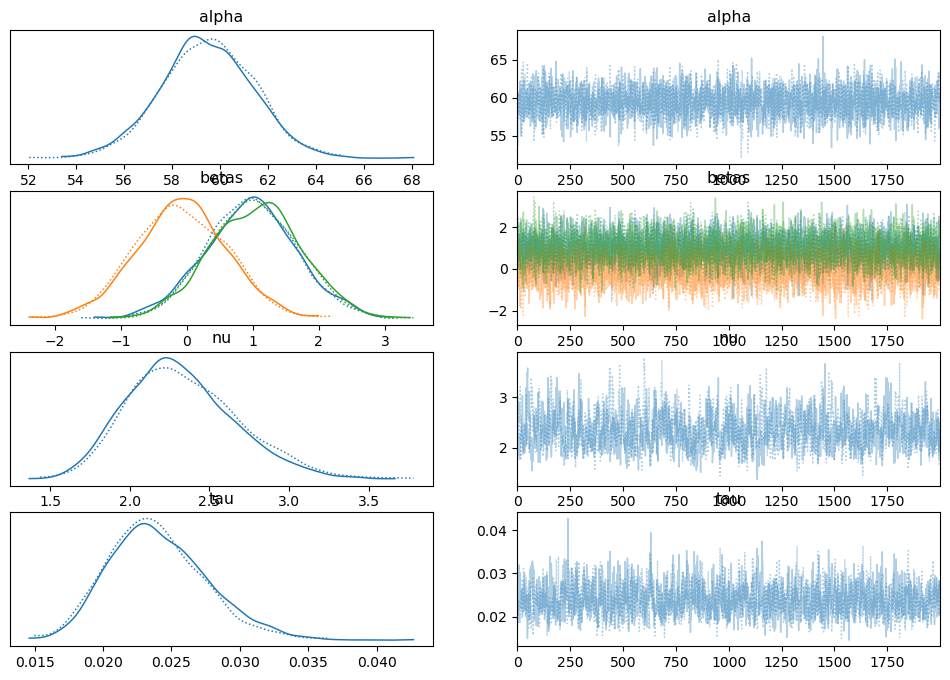

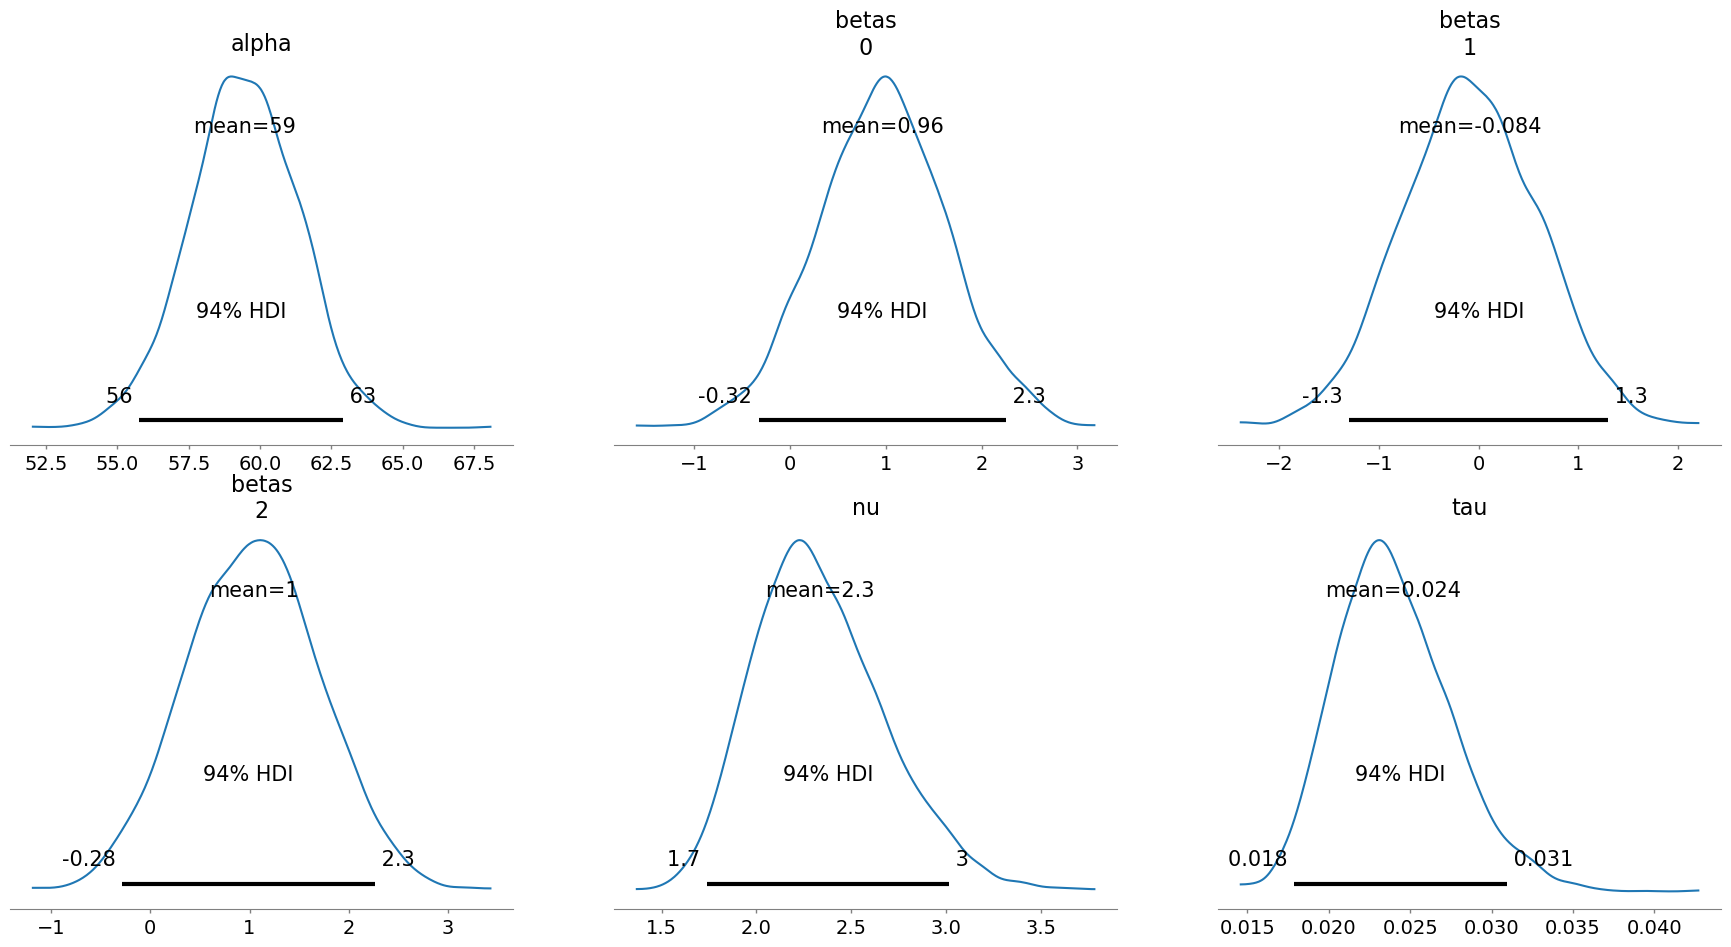

            mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha     59.458  1.898    55.609     63.049      0.030    0.021    4043.0   
betas[0]   0.964  0.683    -0.269      2.445      0.009    0.008    5243.0   
betas[1]  -0.084  0.692    -1.408      1.306      0.009    0.010    6428.0   
betas[2]   1.041  0.681    -0.276      2.377      0.010    0.007    5089.0   
nu         2.335  0.349     1.731      3.055      0.014    0.010     630.0   
tau        0.024  0.004     0.017      0.031      0.000    0.000    1170.0   

          ess_tail  r_hat  
alpha       2963.0    1.0  
betas[0]    3090.0    1.0  
betas[1]    3553.0    1.0  
betas[2]    3466.0    1.0  
nu          1572.0    1.0  
tau         2002.0    1.0  

Data points sorted by mean τ_i (smallest first, likely outliers):
Index 42, mean τ_i ~ 0.026, y = 135.96, X = [2 1 2]
Index 255, mean τ_i ~ 0.034, y = 126.24, X = [2 1 1]
Index 198, mean τ_i ~ 0.037, y = 124.16, X = [1 2 2]
Index 115, mean τ_i ~ 0.039, y =

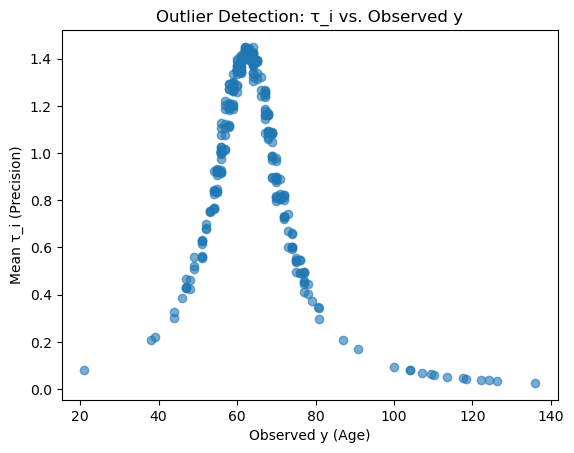

In [53]:
# Q3
import pandas as pd 
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# 1. Load CSV
data = pd.read_csv("survey lung cancer.csv")

# 2. Ensure categorical variables are numeric
data.columns = data.columns.str.strip()

# 3. Specify predictors and outcome column names
predictor_cols = ['FATIGUE', 'SMOKING', 'ANXIETY']  # Numeric predictors
outcome_col = 'AGE'  # Target variable

# 4. Drop missing values
data = data.dropna(subset=predictor_cols + [outcome_col])

# 5. Prepare X and y
X = data[predictor_cols].values
y = data[outcome_col].values
y = y.astype(float)
n, p = X.shape  # Number of observations and predictors

# 6. Introduce Outliers
np.random.seed(365)
num_outliers = int(0.05 * n)  # Introduce 5% as outliers
outlier_indices = np.random.choice(n, num_outliers, replace=False)
y[outlier_indices] += np.random.normal(loc=50, scale=10, size=num_outliers)  # Add large values

print(f"Injected {num_outliers} outliers at indices: {outlier_indices}")
print("X shape:", X.shape)
print("y shape:", y.shape)

# 7. Define Robust Bayesian Model with Outlier Detection
with pm.Model() as robust_lung_cancer_model:
    
    # 7.1 Prior for ν (degrees of freedom for heavy tails)
    nu = pm.Exponential("nu", lam=1/30)

    # 7.2 Local precision per observation τ_i
    tau_i = pm.Gamma("tau_i", alpha=nu/2, beta=nu/2, shape=n)

    # 7.3 Global precision parameter τ
    tau = pm.Gamma("tau", alpha=2.0, beta=1.0)

    # 7.4 Priors for regression coefficients
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p)
    alpha = pm.Normal("alpha", mu=0, sigma=10)

    # 7.5 Mean function
    mu = alpha + pm.math.dot(X, betas)

    # 7.6 Observation-level standard deviations: σ_i = 1 / sqrt(τ * τ_i)
    sigma_i = 1.0 / pm.math.sqrt(tau * tau_i)

    # 7.7 Likelihood function
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma_i, observed=y)

    # 8. MCMC Sampling
    trace = pm.sample(
        draws=2000,
        tune=1000,
        target_accept=0.9,
        cores=1
    )

# 9. Posterior Analysis
# 9.1 Trace plots
az.plot_trace(trace, var_names=["alpha", "betas", "nu", "tau"])
plt.show()

# 9.2 Posterior distributions
az.plot_posterior(trace, var_names=["alpha", "betas", "nu", "tau"])
plt.show()

# 9.3 Summary Table
summary_table = az.summary(trace, var_names=["alpha", "betas", "nu", "tau"], hdi_prob=0.95)
print(summary_table)

# 10. Identifying Outliers using τ_i
posterior_tau_i = trace.posterior["tau_i"]
mean_tau_i = posterior_tau_i.mean(dim=["chain", "draw"]).values

# Sort observations by τ_i (smallest values indicate higher variance → potential outliers)
sorted_indices = np.argsort(mean_tau_i)

print("\nData points sorted by mean τ_i (smallest first, likely outliers):")
for i in sorted_indices[:10]:  # Show top 10 potential outliers
    print(f"Index {i}, mean τ_i ~ {mean_tau_i[i]:.3f}, y = {y[i]:.2f}, X = {X[i]}")

# 11. Influence Analysis using Hat Matrix H
# Compute D = diag(σ_i^2)
posterior_sigma_i2 = 1.0 / (trace.posterior["tau"] * trace.posterior["tau_i"])
mean_sigma_i2 = posterior_sigma_i2.mean(dim=["chain", "draw"]).values

# Ensure no zero or very small values in D (add small constant for stability)
D = np.diag(mean_sigma_i2 + 1e-6)

# Compute hat matrix using pseudo-inverse to handle singularity
H = X @ np.linalg.pinv(X.T @ D @ X) @ X.T  # Use pseudo-inverse instead of np.linalg.inv
influence_scores = np.diag(H)

# Sort by influence scores (largest first)
sorted_influence_indices = np.argsort(-influence_scores)

print("\nData points sorted by influence (largest first):")

for i in sorted_influence_indices[:10]:  # Show top 10 influential points
    print(f"Index {i}, influence score ~ {influence_scores[i]:.3f}, y = {y[i]:.2f}, X = {X[i]}")
plt.scatter(y, mean_tau_i, alpha=0.6)
plt.xlabel("Observed y (Age)")
plt.ylabel("Mean τ_i (Precision)")
plt.title("Outlier Detection: τ_i vs. Observed y")
plt.show()

